In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### General

In [0]:
#Importamos métricas de evaluación extrínsica que se usarán para la evalución de los distintos algoritmos
from sklearn.metrics import calinski_harabasz_score, silhouette_score

#Creamos una tabla para comparar los datos
column_names = ["calinski_harabasz", "silhouette_score"]
index_names=["Kmeans","Aglomerativo","DBSCAN","Espectral"]
df = pd.DataFrame(columns = column_names)

In [0]:
# Obtenemos el data set
data = pd.read_csv("https://raw.githubusercontent.com/jignacioh/ActividadAprendizaNoSupervisado/master/Mall_Customers.csv") 

In [0]:
# Vamos a analizar en base a dos variables:  Ingresos y Puntaje de gastos asociados a un consumidor
Dx = data.iloc[:, [3, 4]].values

### K means


Centros encontrados...
[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


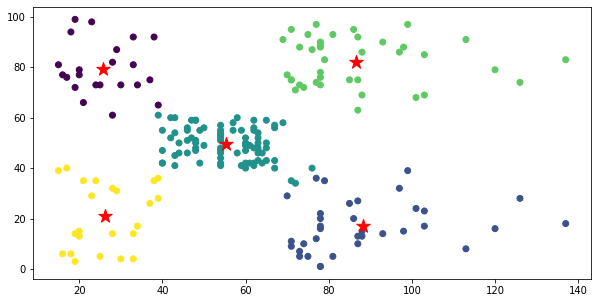

In [10]:
from sklearn.cluster import KMeans

# Se inicializa KMeans con el número de clústeres a buscar
k_means = KMeans(n_clusters=5)

# Se aprende el modelo
k_means = k_means.fit(Dx)

# Predicción de clusters
Dy_kmeans= k_means.predict(Dx)

# Obtenemos los centros de los clústeres
cDx_kmeans = k_means.cluster_centers_

print("Centros encontrados...")
print(cDx_kmeans)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy_kmeans)
ax.scatter(cDx_kmeans[:,0],cDx_kmeans[:,1], marker='*', s=200, c='r')

In [11]:
df.loc['kmeans'] = [calinski_harabasz_score(Dx, Dy_kmeans),silhouette_score(Dx,Dy_kmeans) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932


### Agrupamiento aglomerativo

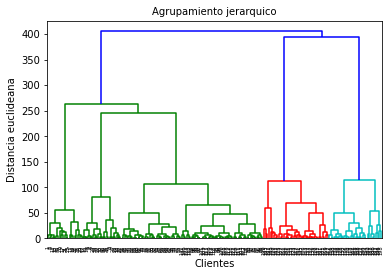

In [12]:
import scipy.cluster.hierarchy as sch
#Realizamos la gráfica a través del método de scipy llamado dendrograme. Como parametros le pasamos 
dendrogram = sch.dendrogram(sch.linkage(Dx, method = 'ward'))
plt.title('Agrupamiento jerarquico', fontsize = 10)
plt.xlabel('Clientes')
plt.ylabel('Distancia euclideana')
plt.show()

Implementamos el algoritmo a través de la librería de sklearn. Como parametros le pasamos el número de clusters, la forma en que vamos a medir la distancia (euclideana). El parámetro de linkage nos da la opción de elegir el método que utilizaremos para fusionar los pares de clusters. Las alternativas existentes son: Ward: minimiza la varianza de los grupos que se fusionan. Avarage: usa el promedio de las distancias de cada observación de los dos conjuntos. Complete: utiliza las distancias máximas entre todas las observaciones de los dos conjuntos. Single: usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.  

Implementamos el método para agrupamiento jerarquico disponible en sklearn en donde establecemos 3 parametros:  

N° de clusters  
Affinity: se establece la forma en que se calculará la distancia
Linkage: Se establece cual es el criterio de vinculación entre los pares de cluster. El algoritmo fusionará los pares de clúster que minimizan este criterio
     Dentro de los criterios se encuentran:  
     - average: usa el promedio de las distancias de cada observación de los dos conjuntos.  
     - complete: utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.  
     - single: usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.  

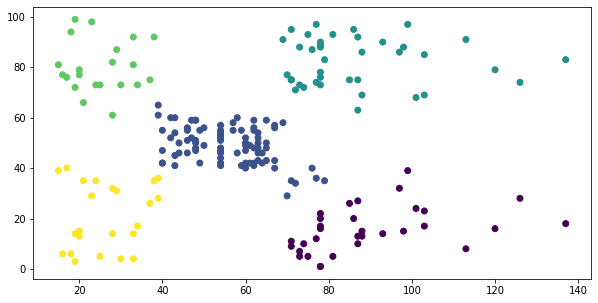

In [13]:
from sklearn.cluster import AgglomerativeClustering
aglomerativo= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

#Se aprende el modelo
aglomerativo=aglomerativo.fit(Dx)

#Prediccion de clusters
Dy_aglomerativo=aglomerativo.fit_predict(Dx)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy_aglomerativo)
#ax.scatter(cDx_kmeans[:,0],cDx_kmeans[:,1], marker='*', s=200, c='r')

In [14]:
df.loc['algomerativo'] = [calinski_harabasz_score(Dx, Dy_aglomerativo),silhouette_score(Dx,Dy_aglomerativo) ]
df

,calinski_harabasz,silhouette_score
kmeans,247.358993,0.553932
algomerativo,243.071429,0.552995


### Espectral

### DBSCAN

### Probabilistico